<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-2-Kaggle-Challenge/blob/master/module1/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```




##Features
Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

amount_tsh : Total static head (amount water available to waterpoint)</br>
date_recorded : The date the row was entered</br>
funder : Who funded the well</br>
gps_height : Altitude of the well</br>
installer : Organization that installed the well</br>
longitude : GPS coordinate</br>
latitude : GPS coordinate</br>
wpt_name : Name of the waterpoint if there is one</br>
num_private :</br>
basin : Geographic water basin</br>
subvillage : Geographic location</br>
region : Geographic location</br>
region_code : Geographic location (coded)</br>
district_code : Geographic location (coded)</br>
lga : Geographic location</br>
ward : Geographic location</br>
population : Population around the well</br>
public_meeting : True/False</br>
recorded_by : Group entering this row of data</br>
scheme_management : Who operates the waterpoint</br>
scheme_name : Who operates the waterpoint</br>
permit : If the waterpoint is permitted</br>
construction_year : Year the waterpoint was constructed</br>
extraction_type : The kind of extraction the waterpoint uses</br>
extraction_type_group : The kind of extraction the waterpoint uses</br>
extraction_type_class : The kind of extraction the waterpoint uses</br>
management : How the waterpoint is managed</br>
management_group : How the waterpoint is managed</br>
payment : What the water costs</br>
payment_type : What the water costs</br>
water_quality : The quality of the water</br>
quality_group : The quality of the water</br>
quantity : The quantity of water</br>
quantity_group : The quantity of water</br>
source : The source of the water</br>
source_type : The source of the water</br>
source_class : The source of the water</br>
waterpoint_type : The kind of waterpoint</br>
waterpoint_type_group : The kind of waterpoint</br>

###Labels</br>
There are three possible values:

functional : the waterpoint is operational and there are no repairs needed</br>
functional needs repair : the waterpoint is operational, but needs repairs</br>
non functional : the waterpoint is not operational</br>

### Installations

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

     |████████████████████████████████| 92kB 3.4MB/s 
     |████████████████████████████████| 133kB 8.9MB/s 
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
     |████████████████████████████████| 614kB 41.9MB/s 
     |████████████████████████████████| 225kB 45.0MB/s 
     |████████████████████████████████| 768kB 38.4MB/s 
     |████████████████████████████████| 194kB 49.5MB/s 
     |████████████████████████████████| 51kB 21.0MB/s 
     |████████████████████████████████| 51kB 23.3MB/s 
     |████████████████████████████████| 737kB 53.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=dfa4e8f5c4a4610a4a023e855ada5d8641d3c792e8ab44b128f683d73657a849
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=61d93ea4b0ced84d0bff47fea092bab9afffad06c

### Assignment

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [20]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=11)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [29]:
import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

In [44]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,date_year,years_since_inspection
17542,58548,0.0,2011-07-19,Government Of Tanzania,0,RWE,31.754647,-1.028912,Kwamsebula,0,Lake Victoria,Byazi,Kagera,18,7,Misenyi,Kanyigo,0,True,GeoData Consultants Ltd,VWC,Kan,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2011,2011
6438,7375,0.0,2012-10-12,Rwssp,0,RWSSP,33.042331,-3.739193,Mtendeni,0,Lake Victoria,Igenge,Shinyanga,17,3,Shinyanga Rural,Ilola,0,True,GeoData Consultants Ltd,WUG,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2012,2012
56246,47821,0.0,2011-03-29,Go,1160,Go,36.915392,-6.008078,Mnafu,0,Wami / Ruvu,Mnafu,Morogoro,5,1,Kilosa,Kibedya,90,True,GeoData Consultants Ltd,VWC,NaN,True,1977,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,2011,34
612,38775,0.0,2012-10-16,Oxfam,0,SIMBA CO,33.522067,-3.878338,Nkindodidi,0,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2012,2012
14539,58653,0.0,2013-01-25,NaN,1672,NaN,34.901169,-4.890076,Coloneri Muna,0,Internal,Msimbwa,Singida,13,2,Singida Rural,Siuyu,1,True,GeoData Consultants Ltd,VWC,NaN,NaN,1990,other,other,other,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other,non functional,2013,23


In [0]:
# create feature with just year of inspection
train['date_year'] = pd.to_datetime(train['date_recorded']).dt.year

# engineer feature for how many years between construction and inspection
# there are many zeros in construction year so lets look at what can be done to fix this
# the best route is likely to be replacing 0's with NAN
train['years_since_inspection'] = train['date_year'] - train['construction_year']

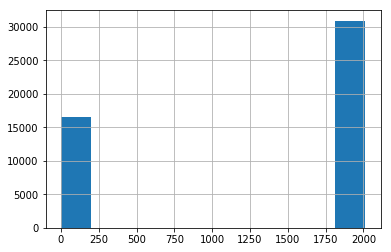

In [49]:
# visualize construction year
train['construction_year'].hist()

In [46]:
# look at value counts
train['construction_year'].value_counts()

0       16593
2010     2127
2008     2073
2009     2015
2000     1656
2007     1264
2006     1176
2003     1027
2011      985
2004      895
2002      861
2012      851
1978      845
2005      809
1995      798
1999      796
1985      789
1998      781
1990      763
1980      664
1996      649
1984      623
1994      588
1982      580
1972      558
1974      549
1997      522
1992      515
1993      493
2001      425
1988      417
1983      396
1975      358
1986      348
1976      335
1970      328
1989      248
1991      246
1987      237
1981      188
1977      166
1979      160
2013      140
1973      139
1971      113
1960       86
1967       75
1963       68
1968       56
1969       39
1964       35
1962       23
1961       19
1965       17
1966       13
Name: construction_year, dtype: int64

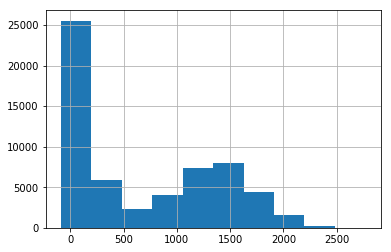

In [10]:
train['gps_height'].hist()

In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    
    # add year column to df
    X['year'] = x['date_recorded'].to_datetime


    # return the wrangled dataframe
    return X


X_train = wrangle(train)
X_val = wrangle(val)
test = wrangle(test)

In [0]:
# create numeric groups
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

In [26]:
X_train_numeric.isnull().sum()

id                      0
amount_tsh              0
gps_height              0
longitude            1448
latitude             1448
num_private             0
region_code             0
district_code           0
population              0
construction_year       0
dtype: int64

In [28]:
# drop na's
X_train_numeric.dropna(inplace=True)
X_val_numeric.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



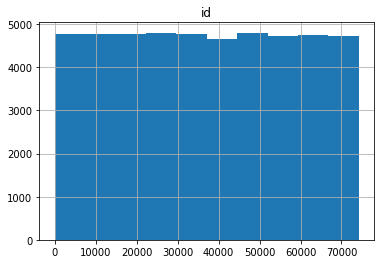

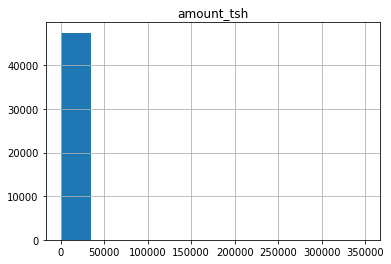

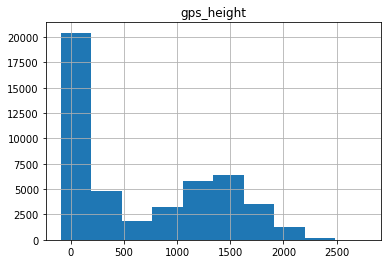

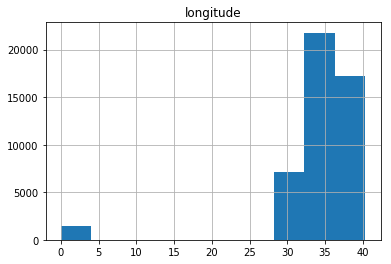

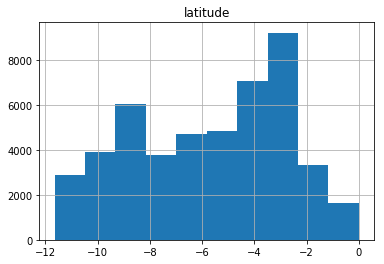

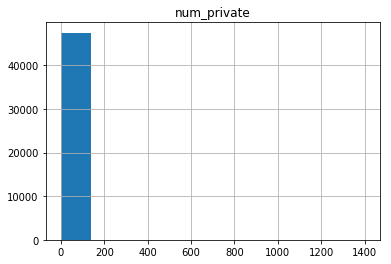

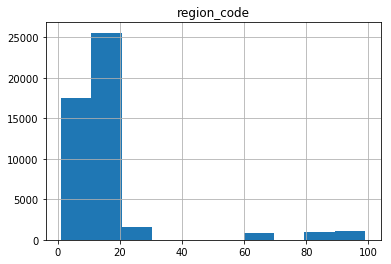

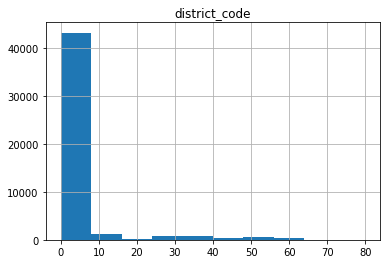

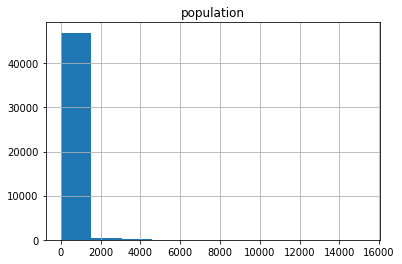

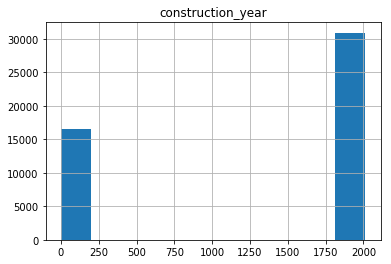

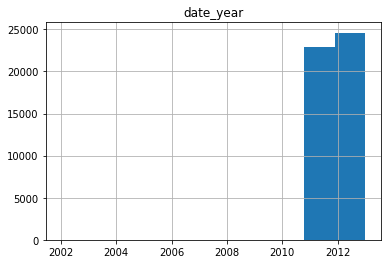

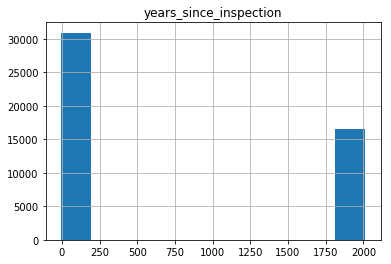

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt

# separate numeric columns
train_numeric = train.select_dtypes(include='number')

for i in train_numeric.columns:
  train_numeric[i].hist()
  plt.title(i)
  plt.show()

In [52]:
train['num_private'].value_counts()

0       46897
6          68
1          62
5          37
8          37
45         32
32         32
39         26
15         25
93         24
3          22
102        18
4          17
47         17
7          17
2          17
17         16
65         15
80         13
11         11
20         11
25         10
41         10
34          9
120         7
150         6
16          5
22          5
12          4
9           4
50          4
58          3
61          3
24          3
38          3
14          3
10          2
27          2
26          2
160         1
131         1
672         1
450         1
668         1
30          1
698         1
60          1
136         1
42          1
1402        1
141         1
62          1
111         1
755         1
180         1
213         1
23          1
55          1
87          1
94          1
Name: num_private, dtype: int64